This dataset is imported from Kaggle, see the following link for more informations : https://www.kaggle.com/blastchar/telco-customer-churn

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df_original = pd.read_csv("original_churn_telco_dataset.csv")

In [48]:
df_original.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
print(df_original.columns)
print("\n")
print("===================================================================")
print(df_original.info())

Index([u'customerID', u'gender', u'SeniorCitizen', u'Partner', u'Dependents',
       u'tenure', u'PhoneService', u'MultipleLines', u'InternetService',
       u'OnlineSecurity', u'OnlineBackup', u'DeviceProtection', u'TechSupport',
       u'StreamingTV', u'StreamingMovies', u'Contract', u'PaperlessBilling',
       u'PaymentMethod', u'MonthlyCharges', u'TotalCharges', u'Churn'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object

In [50]:
df_reworked = df_original.copy()
df_reworked['TotalCharges'] = pd.to_numeric(df_reworked['TotalCharges'], errors='coerce')
# df_original['SeniorCitizen'] = df_original['SeniorCitizen'].astype(str) => Not necessary as it needs to be a number in order to be used for ML
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [54]:
is_null = df_reworked['TotalCharges'].isnull()
df_original[is_null]['TotalCharges']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


### Conclusion - EDA part 1 - Data format / consitency

* Lots of features are string (object in pandas), we will need to convert those in order to enable their use for building ML models
* 'TotalCharges' feature is considered as an object, meaning that at least one entry is not in the right format. As analyzed in the above cell, thoses values are empty (and converted to NaN when we convert the datatype)

In [52]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [53]:
x

488     4472-LVYGI
753     3115-CZMZD
936     5709-LVOEQ
1082    4367-NUYAO
1340    1371-DWPAZ
3331    7644-OMVMY
3826    3213-VVOLG
4380    2520-SGTTA
5218    2923-ARZLG
6670    4075-WKNIU
6754    2775-SEFEE
Name: customerID, dtype: object

In [31]:
df_original[df_original['customerID'] in x]

TypeError: 'Series' objects are mutable, thus they cannot be hashed

[Text(0.5,0,u'Amount'), Text(0.5,1,u'PaymentMethod')]

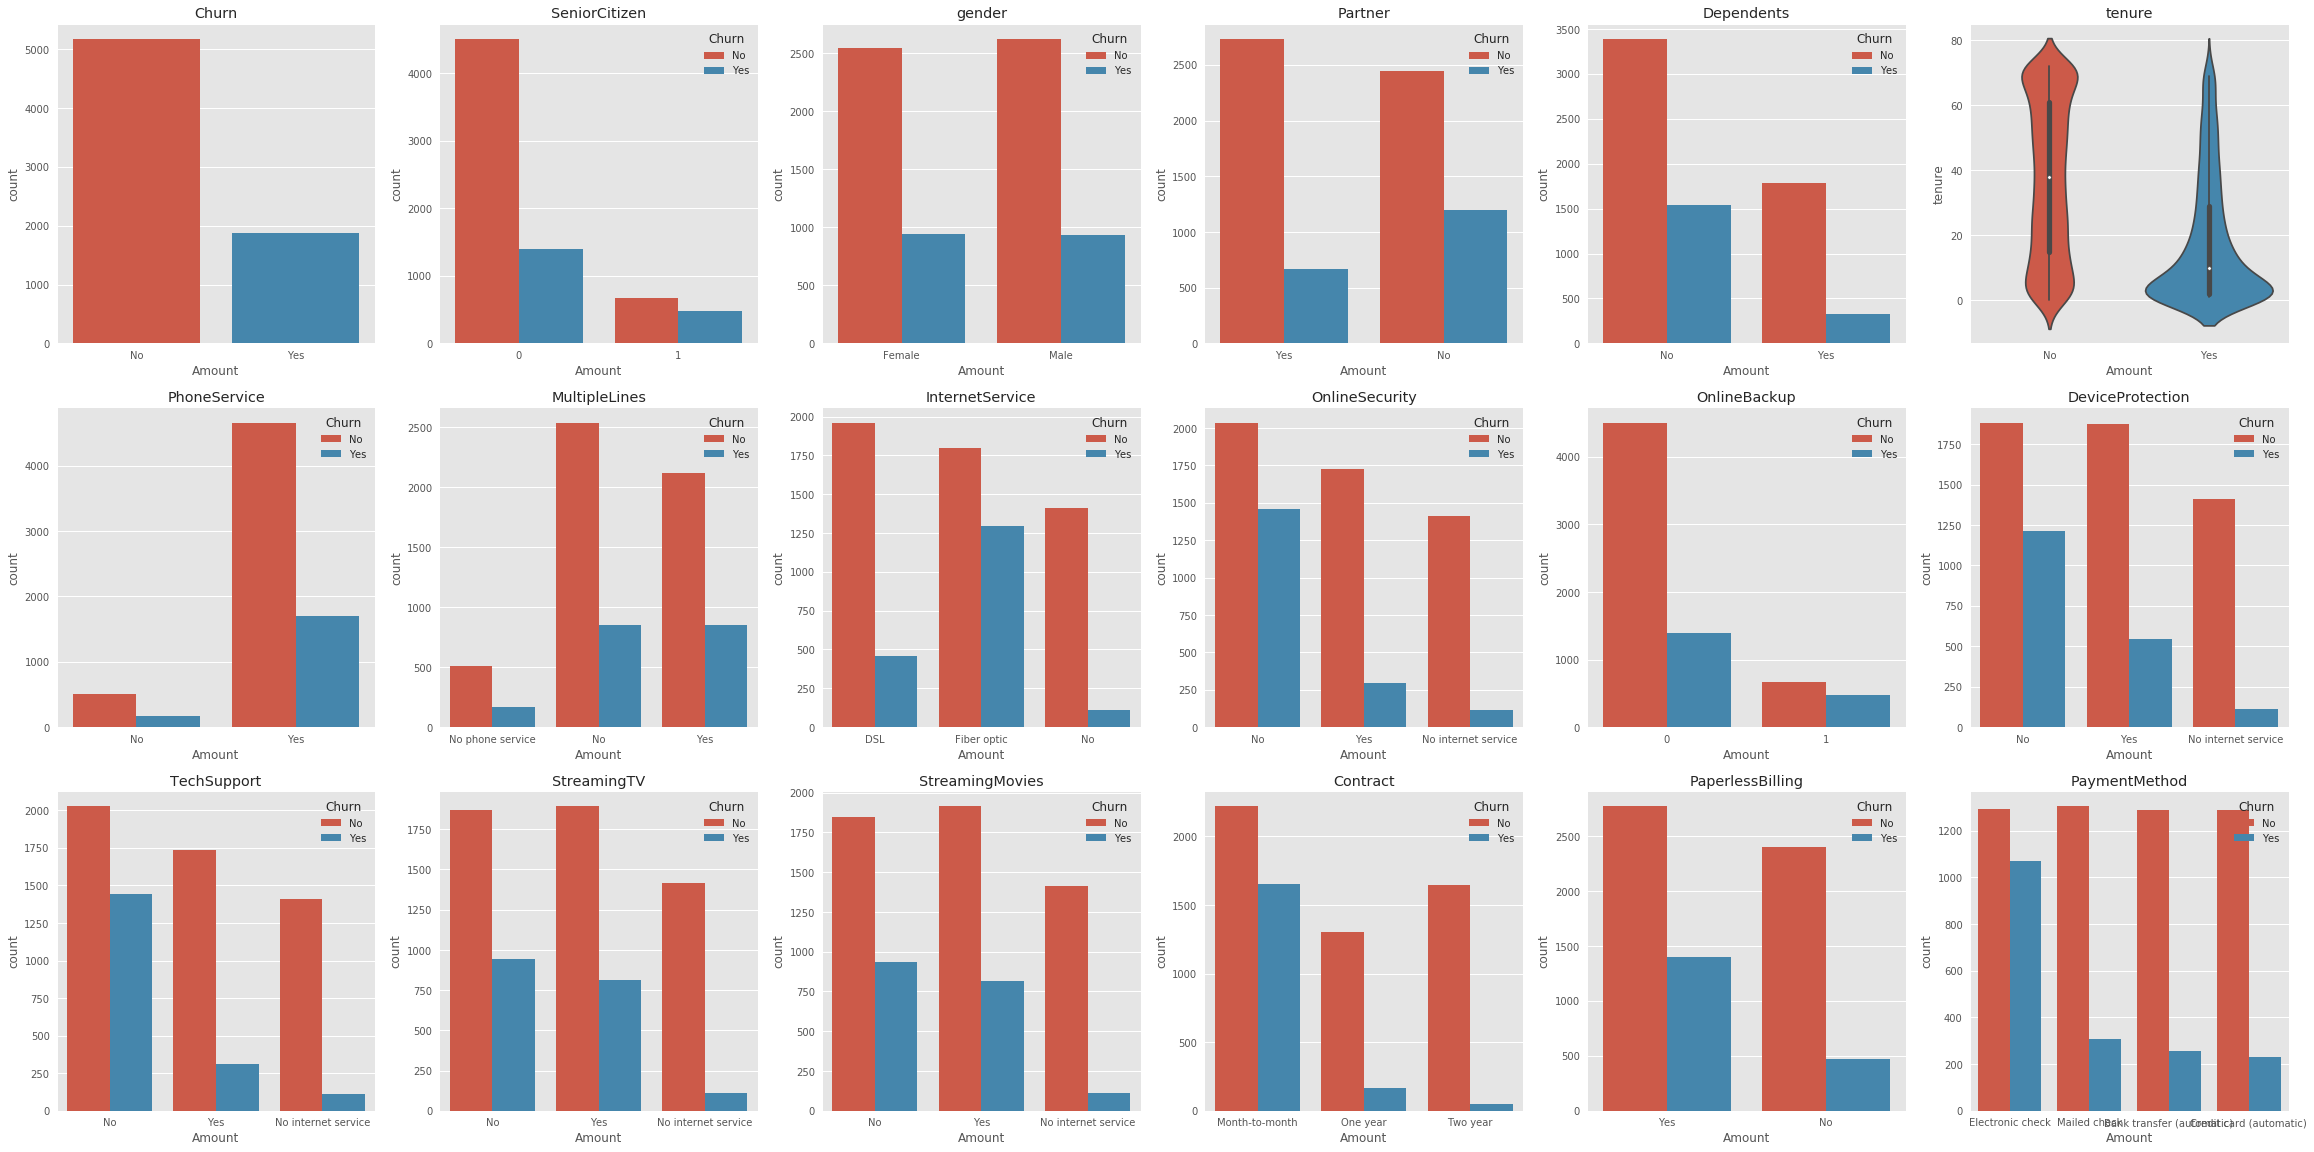

In [104]:
plt.style.use('ggplot')
fig, ax = plt.subplots(3, 6, figsize=(40, 20))

sns.countplot(df_original["Churn"], ax=ax[0, 0])
ax[0, 0].set(title='Churn', xlabel='Amount')

sns.countplot(df_original['SeniorCitizen'], hue=df_original["Churn"], ax=ax[0, 1])
ax[0, 1].set(title='SeniorCitizen', xlabel='Amount')

sns.countplot(df_original['gender'], hue=df_original["Churn"], ax=ax[0, 2])
ax[0, 2].set(title='gender', xlabel='Amount')

sns.countplot(df_original['Partner'], hue=df_original["Churn"], ax=ax[0, 3])
ax[0, 3].set(title='Partner', xlabel='Amount')

sns.countplot(df_original['Dependents'], hue=df_original["Churn"], ax=ax[0, 4])
ax[0, 4].set(title='Dependents', xlabel='Amount')

sns.violinplot(x="Churn", y='tenure', data=df_original, ax=ax[0, 5])
ax[0, 5].set(title='tenure', xlabel='Amount')

sns.countplot(df_original['PhoneService'], hue=df_original["Churn"], ax=ax[1, 0])
ax[1, 0].set(title='PhoneService', xlabel='Amount')

sns.countplot(df_original['MultipleLines'], hue=df_original["Churn"], ax=ax[1, 1])
ax[1, 1].set(title='MultipleLines', xlabel='Amount')

sns.countplot(df_original['InternetService'], hue=df_original["Churn"], ax=ax[1, 2])
ax[1, 2].set(title='InternetService', xlabel='Amount')

sns.countplot(df_original['OnlineSecurity'], hue=df_original["Churn"], ax=ax[1, 3])
ax[1, 3].set(title='OnlineSecurity', xlabel='Amount')

sns.countplot(df_original['SeniorCitizen'], hue=df_original["Churn"], ax=ax[1, 4])
ax[1, 4].set(title='OnlineBackup', xlabel='Amount')

sns.countplot(df_original['DeviceProtection'], hue=df_original["Churn"], ax=ax[1, 5])
ax[1, 5].set(title='DeviceProtection', xlabel='Amount')

sns.countplot(df_original['TechSupport'], hue=df_original["Churn"], ax=ax[2, 0])
ax[2, 0].set(title='TechSupport', xlabel='Amount')

sns.countplot(df_original['StreamingTV'], hue=df_original["Churn"], ax=ax[2, 1])
ax[2, 1].set(title='StreamingTV', xlabel='Amount')

sns.countplot(df_original['StreamingMovies'], hue=df_original["Churn"], ax=ax[2, 2])
ax[2, 2].set(title='StreamingMovies', xlabel='Amount')

sns.countplot(df_original['Contract'], hue=df_original["Churn"], ax=ax[2, 3])
ax[2, 3].set(title='Contract', xlabel='Amount')

sns.countplot(df_original['PaperlessBilling'], hue=df_original["Churn"], ax=ax[2, 4])
ax[2, 4].set(title='PaperlessBilling', xlabel='Amount')

sns.countplot(df_original['PaymentMethod'], hue=df_original["Churn"], ax=ax[2, 5])
ax[2, 5].set(title='PaymentMethod', xlabel='Amount')

In [105]:
"""
for variable in df_original.columns:
  print(variable)
  print(df_original[variable].value_counts())
  print('======================================================')
"""




"\nfor variable in df_original.columns:\n  print(variable)\n  print(df_original[variable].value_counts())\n  print('======================================================')\n"

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


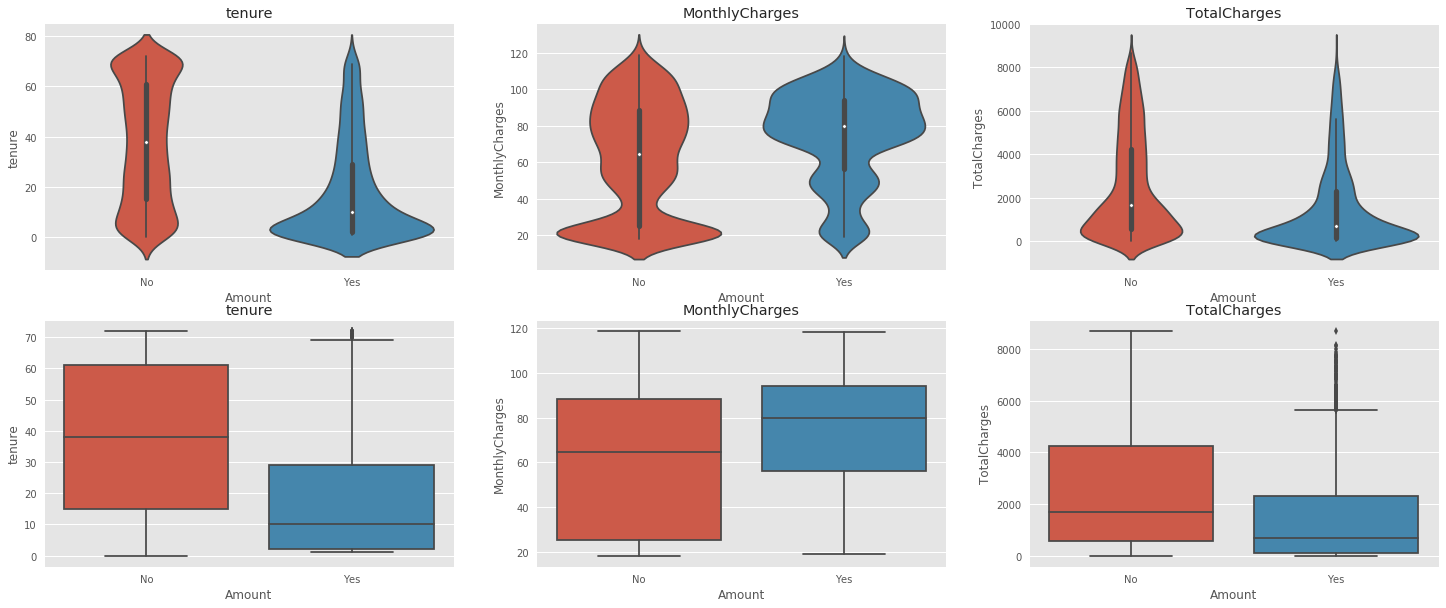

In [112]:
fig_2, ax = plt.subplots(2, 3, figsize=(25, 10))

sns.violinplot(x="Churn", y='tenure', data=df_original, ax=ax[0, 0])
ax[0, 0].set(title='tenure', xlabel='Amount')

sns.violinplot(x="Churn", y='MonthlyCharges', data=df_original, ax=ax[0, 1])
ax[0, 1].set(title='MonthlyCharges', xlabel='Amount')

sns.violinplot(x="Churn", y='TotalCharges', data=df_original, ax=ax[0, 2])
ax[0, 2].set(title='TotalCharges', xlabel='Amount')

sns.boxplot(x="Churn", y='tenure', data=df_original, ax=ax[1, 0])
ax[1, 0].set(title='tenure', xlabel='Amount')

sns.boxplot(x="Churn", y='MonthlyCharges', data=df_original, ax=ax[1, 1])
ax[1, 1].set(title='MonthlyCharges', xlabel='Amount')

sns.boxplot(x="Churn", y='TotalCharges', data=df_original, ax=ax[1, 2])
ax[1, 2].set(title='TotalCharges', xlabel='Amount')

print("===============================================================================")

df_original.describe()

In [107]:
df_original.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


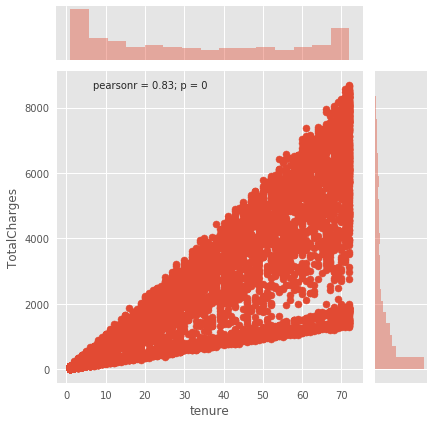

In [131]:
sns.jointplot(x="tenure", y="TotalCharges", data=df_original)

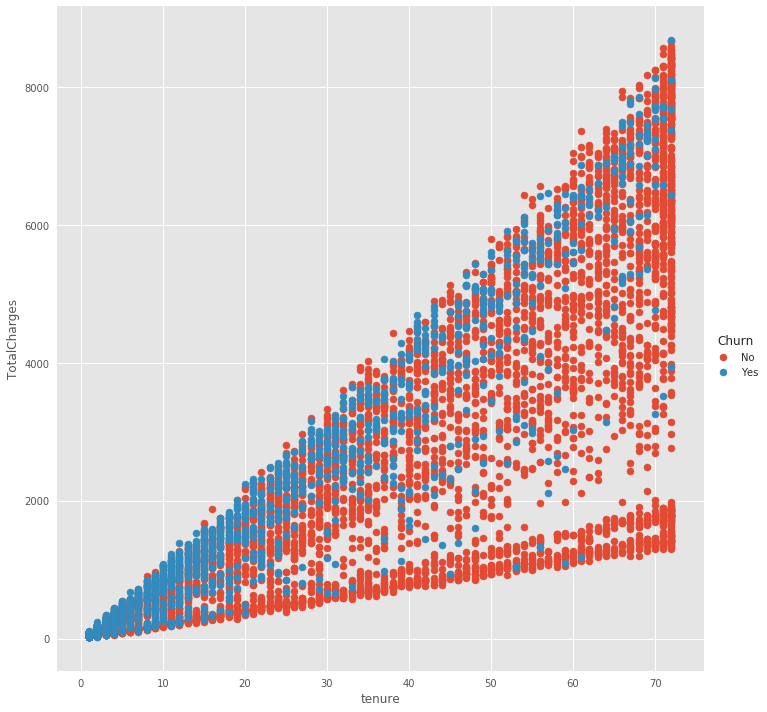

In [132]:
sns.FacetGrid(df_original, hue="Churn", size=10) \
   .map(plt.scatter, "tenure", "TotalCharges") \
   .add_legend()

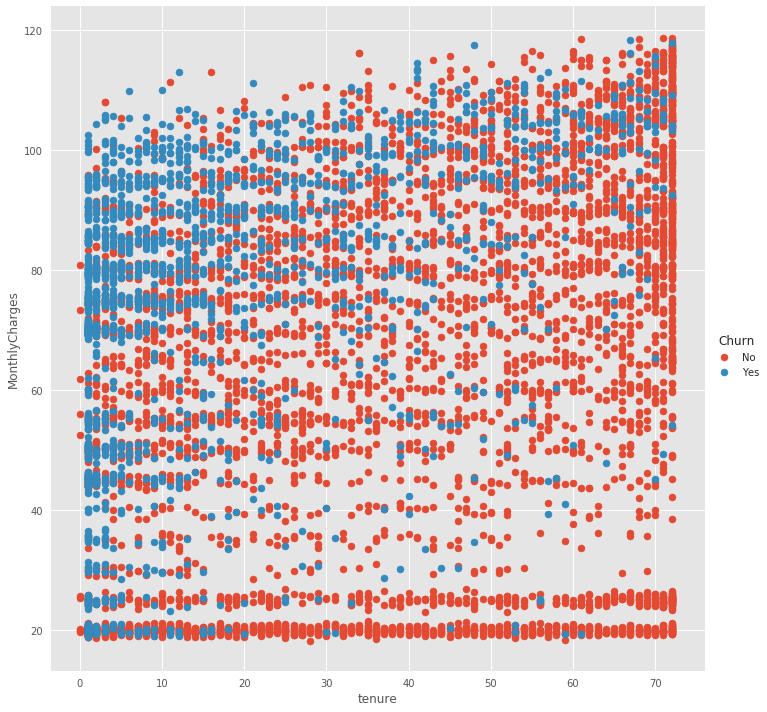

In [133]:
sns.FacetGrid(df_original, hue="Churn", size=10) \
   .map(plt.scatter, "tenure", "MonthlyCharges") \
   .add_legend()

### Conclusion - EDA part 2 - feature relationships

#### ML irrelevant features

* 'CustomerID' : unique to each observation 

#### Qualitative features

#### Quantitative features